CSc 599.69 Visualization, Spring 2017, Homework 2
=======================================================


Let me be very clear. Regardless of how little time or what happened in your life, your solutions should
not contain code or text that were copied from other students (this year or prior years). Doing so
is a violation of the academic honor code. Please


Exercise 1: Advanced matplotlib: Publication-ready plots
----------------------------------------------------------------------------------
The goal of this exercise is to get accustomed to object-oriented interface to matplotlib and go through entire process of figure preparation - from design to the final figure ready for submission. Exercise taken from https://github.com/btel/visualization-talk updated by Hannah Aizenman and Michael Grossberg

* Given the code below:
    * Read comments and identify basic matplotlib artists (like lines, axes, etc.)
    * Try to understand how ``spines`` in matplotlib work and how they provide framing and at the same time show data range and hide the default top ticks.

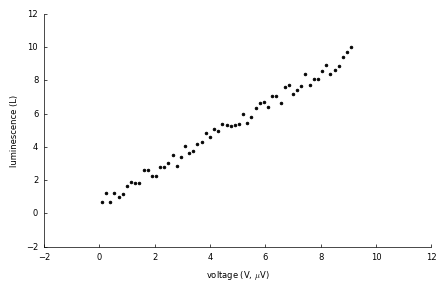

In [291]:
%matplotlib inline
import numpy as np
import matplotlib


import matplotlib.pyplot as plt
import matplotlib as mpl

# generate some random data
t = np.arange(0.1, 9.2, 0.15)
y = t+np.random.rand(len(t))

#first create the figure
fig = plt.figure(figsize=(5,3))

#create a grid of 1 row and 1 column for the plot
#[left, bottom, width, height]
gs = mpl.gridspec.GridSpec(1,1)
#put a plot in the first row, first column
ax = fig.add_subplot(gs[0])

#Have only two spines visible and set properties
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_linewidth(.5)
ax.xaxis.set_ticks_position('bottom')

ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(0.5)
ax.yaxis.set_ticks_position('left')

#set tick properties
ax.xaxis.set_tick_params('major', length=2, labelsize=6)
ax.yaxis.set_tick_params('major', length=2, labelsize=6)

#plot data and customize look of plot
ax.plot(t,y, marker='.', color='k', linestyle='',
        markersize=4, clip_on=False)

#set axis limits 
ax.set_xlim((-2,12))
ax.set_ylim((-2,12))

#scale the view to show all datapoints
ax.autoscale_view()

#set labels
ax.set_xlabel(r'voltage (V, $\mu$V)', fontsize=6, family='sans-serif')
ax.set_ylabel('luminescence (L)', fontsize=6, family='sans-serif')

fig.savefig('mpl_template.svg')

* Import the supplied CSV file ``crabs.csv``. The easiest way to do it is to use ``numpy.recfromcsv`` function. This returns a NumPy record array with the fields as descibed in Pt. 2 of Advanded matplotlib exercise.

In [292]:
data = np.recfromcsv('crabs.csv')
data.dtype.fields

mappingproxy({'bd': (dtype('float64'), 50),
              'cl': (dtype('float64'), 34),
              'cw': (dtype('float64'), 42),
              'f0': (dtype('int64'), 0),
              'fl': (dtype('float64'), 18),
              'index': (dtype('int64'), 10),
              'rw': (dtype('float64'), 26),
              'sex': (dtype('S1'), 9),
              'sp': (dtype('S1'), 8)})

These data have 0 rows and 8 columns, describing 5 morphological measurements on 50 crabs each of two colour forms and both sexes, of the species Leptograpsus variegatus collected at Fremantle, W. Australia (From Venables & Ripley,Modern Applied Statistics with S, Springer, 2002).

The file contain following columns:
    * ``sp`` species - B (blue) or O (orange)
    * ``sex`` you may guess
    * ``index`` 1:50 for each group (blue male, blue female, etc.)
    * ``FL`` frontal lobe size (mm)
    * ``RW`` rear width (mm). 
    * ``CL`` carapace length (mm).
    * ``CW`` carapace width (mm).
    * ``BD`` body depth (mm).

Recommend way of doing it is with ``numpy.recfromcsv`` function (returns a numpy record array introduced during the numpy lecture), but other alternatives are allowed (such as ``csv`` module, pandas, or standard IO).
   
3. Modify the plot template to plot two of the above measurements against each other. Do not forget to update labels!

4. Add a third dimension to the plot using different methods (choose two):

    * plot two different dependent (y) variable against the same independent (x) variable using different markers. Use double y-axes to show the data dimensions (you may define a new Axes object of type ``matplotlib.axes.Axes.twinx``).

    * represent the third variable with the circles of different sizes (Hint: use ``markersize`` keyword argument of ``plot``)

    * represent the third variable on a color scale, add a color bar to the plot
    * represent the data as a short line segments, where the position of line on XY plane encodes two of the variables and the angle of the segment encodes the third one. 
    
    Which of the data representation is the most accurate?

5. Group variables belonging to the same crab group (blue male, blue female, etc., choose one method):
    * by connecting the points with a line
    * by use of color (make sure not to use colors both for representing groups and representing one of dependent variables)

6. Repeat exercise 4 and 5, but represent different dependent variables/groups in different (non-overlapping) axes.
    Does use of multiple panels increase readability?

7. Preparing publication-quality figure file. Let us assume that you want to prepare the final figure for submission by combining panels each of which contains one of the figures presented above. Although it is possible (and straigthforward) to do that by creating independent axes in the figure, often such approach pose several problems (for example, if the panel itself contains several axes, we would have to shift all of them to new positions). Therefore, here we will do that as a post processing step:
   
   * choose two of above figures and export them to SVG file.

   * modify the ``combine_svg.py`` example to read in the figures and
     move them to their final positions.

   * use inkscape from command line to export the generated SVG file
     to a format of choice, such as PDF::
     
         inkscape final_figure1.svg --export-pdf=final_figure1.pdf

   * (Optional) You may easily automate the entire process using a
     simple ``Makefile`` similar to this one:

         mpl_figure1.svg : mpl_figure1.py
             python mpl_figure1.py mpl_figure1.svg

         mpl_figure2.svg : mpl_figure2.py
             python mpl_figure2.py mpl_figure2.svg

         final_figure1.svg : final_figure1.py mpl_figure1.svg mpl_figure2.svg
             python combine_svg.py
         
         %.pdf : %.svg
             inkscape $< --export-pdf=$@
      
8. "Test drive" your figure. Use the "Visualization Checklist" from https://github.com/btel/visualization-talk/blob/master/Lecture/checklist/checklist.rst What could be improved?

# Part 1

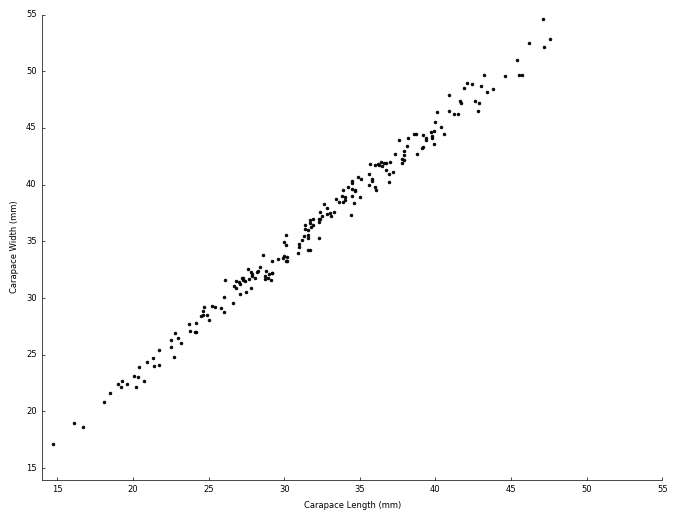

In [293]:
t = data.cl
y = data.cw

#first create the figure
fig = plt.figure(figsize=(8,6))

#create a grid of 1 row and 1 column for the plot
#[left, bottom, width, height]
gs = mpl.gridspec.GridSpec(1,1)
#put a plot in the first row, first column
ax = fig.add_subplot(gs[0])

#Have only two spines visible and set properties
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_linewidth(.5)
ax.xaxis.set_ticks_position('bottom')

ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(0.5)
ax.yaxis.set_ticks_position('left')

#set tick properties
ax.xaxis.set_tick_params('major', length=2, labelsize=6)
ax.yaxis.set_tick_params('major', length=2, labelsize=6)


#plot data and customize look of plot

ax.plot(t,y, marker='.', color='k', linestyle='',
        markersize=4, clip_on=False)

#set axis limits 
ax.set_xlim((14,55))
ax.set_ylim((14,55))

#scale the view to show all datapoints
ax.autoscale_view()

#set labels
ax.set_xlabel(r'Carapace Length (mm)', fontsize=6, family='sans-serif')
ax.set_ylabel('Carapace Width (mm)', fontsize=6, family='sans-serif')

fig.savefig('mpl_template.svg')

# Part 2

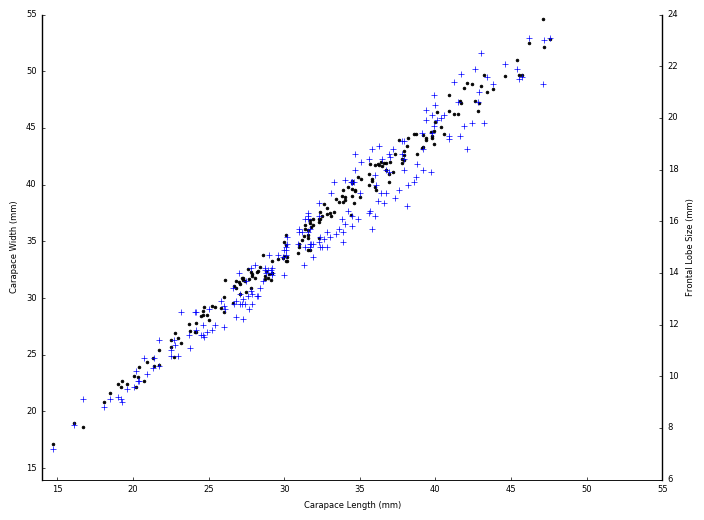

In [294]:
t = data.cl
y = data.cw
y2 = data.fl

#first create the figure
fig = plt.figure(figsize=(8,6))

#create a grid of 1 row and 1 column for the plot
#[left, bottom, width, height]
gs = mpl.gridspec.GridSpec(1,1)
#put a plot in the first row, first column
ax = fig.add_subplot(gs[0])

#Have only two spines visible and set properties
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_linewidth(.5)
ax.xaxis.set_ticks_position('bottom')

ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(0.5)
ax.yaxis.set_ticks_position('left')

#set tick properties
ax.xaxis.set_tick_params('major', length=2, labelsize=6)
ax.yaxis.set_tick_params('major', length=2, labelsize=6)


#plot data and customize look of plot

ax.plot(t,y, marker='.', color='k', linestyle='',
        markersize=4, clip_on=False)

ax2 = ax.twinx()
ax2.plot(t, y2,marker='+', color='b', linestyle='', markersize=4, clip_on=False)
ax2.yaxis.set_tick_params('major', length=2, labelsize=6)
ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_linewidth(.5)
ax2.xaxis.set_ticks_position('bottom')

#set axis limits 
ax.set_xlim((14,55))
ax.set_ylim((14,55))

#scale the view to show all datapoints
ax.autoscale_view()

#set labels
ax.set_xlabel(r'Carapace Length (mm)', fontsize=6, family='sans-serif')
ax.set_ylabel('Carapace Width (mm)', fontsize=6, family='sans-serif')
ax2.set_ylabel('Frontal Lobe Size (mm)', fontsize=6, family='sans-serif')

fig.savefig('mpl_template.svg')

# Part 2b

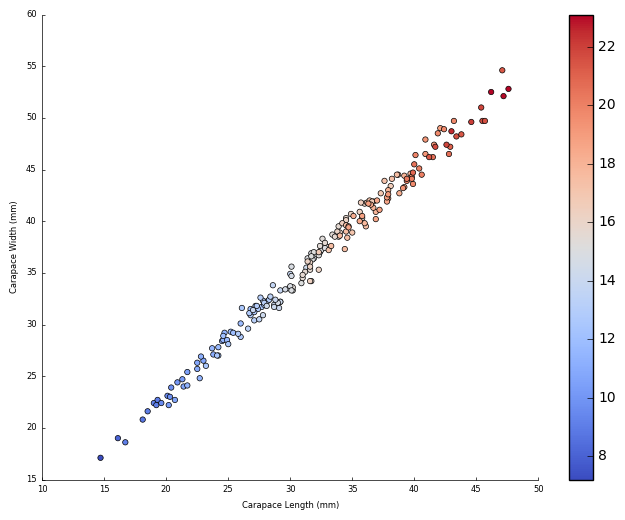

In [12]:
t = data.cl
y = data.cw
y2 = data.fl

#first create the figure
fig = plt.figure(figsize=(8,6))

#create a grid of 1 row and 1 column for the plot
#[left, bottom, width, height]
gs = mpl.gridspec.GridSpec(1,1)
#put a plot in the first row, first column
ax = fig.add_subplot(gs[0])

#Have only two spines visible and set properties
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_linewidth(.5)
ax.xaxis.set_ticks_position('bottom')

ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(0.5)
ax.yaxis.set_ticks_position('left')

#set tick properties
ax.xaxis.set_tick_params('major', length=2, labelsize=6)
ax.yaxis.set_tick_params('major', length=2, labelsize=6)


#plot data and customize look of plot

# ax.plot(t,y, marker='.', color='k', linestyle='',
#         markersize=4, clip_on=False)

# #set axis limits 
# ax.set_xlim((14,55))
# ax.set_ylim((14,55))

#scale the view to show all datapoints
ax.autoscale_view()

#set labels
ax.set_xlabel(r'Carapace Length (mm)', fontsize=6, family='sans-serif')
ax.set_ylabel('Carapace Width (mm)', fontsize=6, family='sans-serif')

plt.scatter(t, y, marker='o', s=15, linewidths=.5, c=y2, cmap=plt.cm.coolwarm)
plt.colorbar()
plt.show()

fig.savefig('mpl_template.svg')

# Part 3

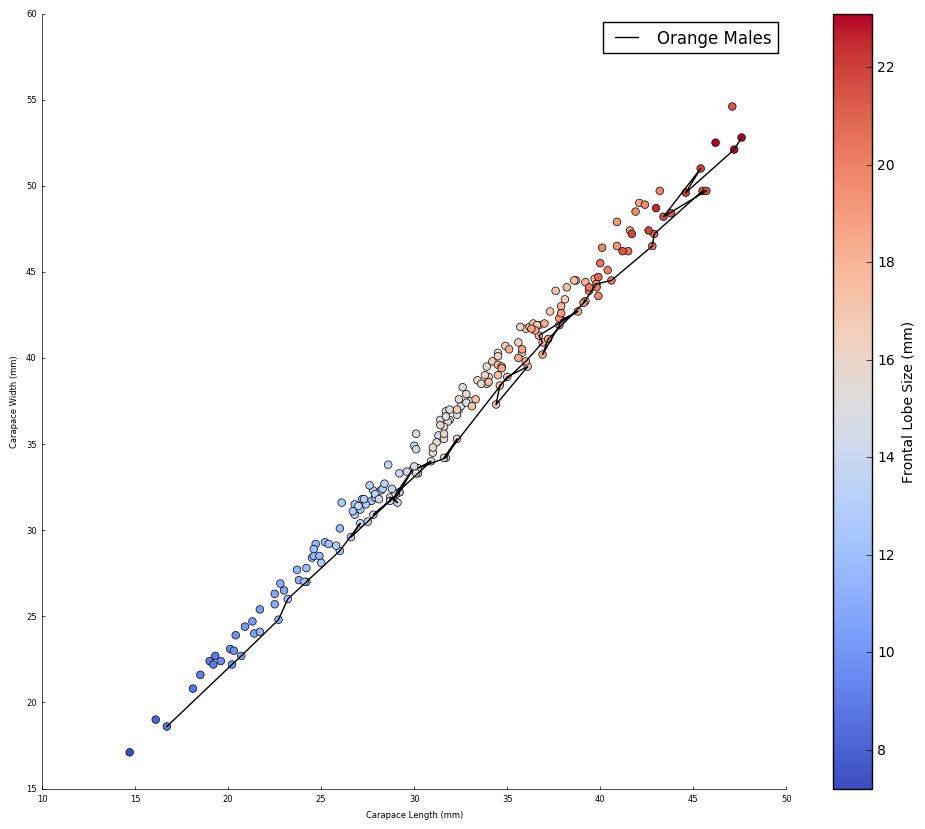

In [295]:
t = data.cl
y = data.cw
y2 = data.fl

#first create the figure
fig = plt.figure(figsize=(12,10))


#create a grid of 1 row and 1 column for the plot
#[left, bottom, width, height]
gs = mpl.gridspec.GridSpec(1,1)
#put a plot in the first row, first column
ax = fig.add_subplot(gs[0])

#Have only two spines visible and set properties
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_linewidth(.5)
ax.xaxis.set_ticks_position('bottom')

ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(0.5)
ax.yaxis.set_ticks_position('left')

#set tick properties
ax.xaxis.set_tick_params('major', length=2, labelsize=6)
ax.yaxis.set_tick_params('major', length=2, labelsize=6)

#scale the view to show all datapoints
ax.autoscale_view()

#set labels
ax.set_xlabel(r'Carapace Length (mm)', fontsize=6, family='sans-serif')
ax.set_ylabel('Carapace Width (mm)', fontsize=6, family='sans-serif')


new_cl = []
new_cw = []
for d in data:
    if d.sex == b'M' and d.sp == b'O' :
        new_cw.append(d.cw)
        new_cl.append(d.cl)
plt.plot(new_cl,new_cw,label="Orange Males", color='k', linestyle='-')
plt.legend()
plt.scatter(t, y, marker='o', s=30, linewidths=.5, c=y2, cmap=plt.cm.coolwarm)
cbar = plt.colorbar()
cbar.ax.set_ylabel('Frontal Lobe Size (mm)')
plt.show()


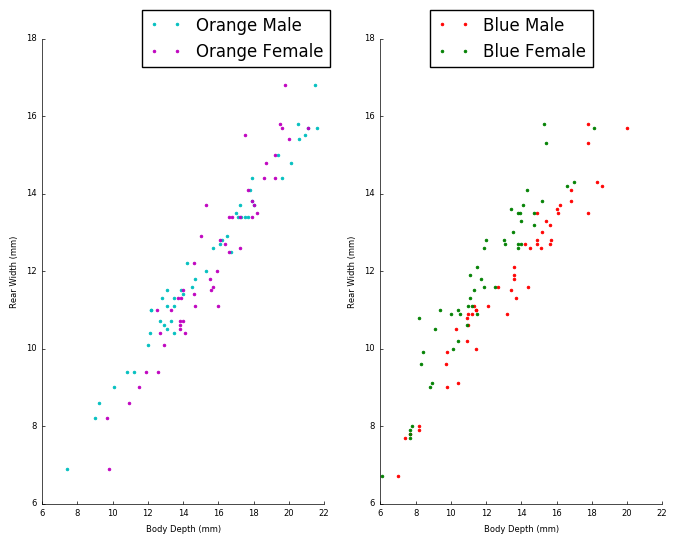

In [127]:
org_male_bd = [crab.bd for crab in data if ((crab.sex == b'M') & (crab.sp == b'O'))]
org_male_rw = [crab.rw for crab in data if ((crab.sex == b'M') & (crab.sp == b'O'))]
org_female_bd = [crab.bd for crab in data if ((crab.sex == b'F') & (crab.sp == b'O'))]
org_female_rw = [crab.rw for crab in data if ((crab.sex == b'M') & (crab.sp == b'O'))]

blu_male_bd = [crab.bd for crab in data if ((crab.sex == b'M') & (crab.sp == b'B'))]
blu_male_rw = [crab.rw for crab in data if ((crab.sex == b'M') & (crab.sp == b'B'))]
blu_female_bd = [crab.bd for crab in data if ((crab.sex == b'F') & (crab.sp == b'B'))]
blu_female_rw = [crab.rw for crab in data if ((crab.sex == b'M') & (crab.sp == b'B'))]


#first create the figure
fig = plt.figure(figsize=(8,6))


#create a grid of 1 row and 1 column for the plot
#[left, bottom, width, height]
gs = mpl.gridspec.GridSpec(1,2)

#put a plot in the first row, first column
ax = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])

#Have only two spines visible and set properties
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_linewidth(.5)
ax.xaxis.set_ticks_position('bottom')

ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(0.5)
ax.yaxis.set_ticks_position('left')

#set tick properties
ax.xaxis.set_tick_params('major', length=2, labelsize=6)
ax.yaxis.set_tick_params('major', length=2, labelsize=6)

#scale the view to show all datapoints
# ax.autoscale_view()

#set labels
ax.set_xlabel(r'Body Depth (mm)', fontsize=6, family='sans-serif')
ax.set_ylabel(r'Rear Width (mm)', fontsize=6, family='sans-serif')

#set axis limits 
ax.set_xlim((6,22))
ax.set_ylim((6,18))

ax2.set_xlim((6,22))
ax2.set_ylim((6,18))


#Have only two spines visible and set properties
ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_linewidth(.5)
ax2.xaxis.set_ticks_position('bottom')

ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_linewidth(0.5)
ax2.yaxis.set_ticks_position('left')

#set tick properties
ax2.xaxis.set_tick_params('major', length=2, labelsize=6)
ax2.yaxis.set_tick_params('major', length=2, labelsize=6)

#scale the view to show all datapoints
# ax2.autoscale_view()

#set labels
ax2.set_xlabel(r'Body Depth (mm)', fontsize=6, family='sans-serif')
ax2.set_ylabel(r'Rear Width (mm)', fontsize=6, family='sans-serif')

ax.plot(org_male_bd,org_male_rw, marker='.', color='c', linestyle='',markersize=4, label='Orange Male', clip_on=False)
ax.plot(org_female_bd,org_female_rw, marker='.', color='m', linestyle='',markersize=4,label='Orange Female', clip_on=False)

ax2.plot(blu_male_bd,blu_male_rw, marker='.', color='r', linestyle='',markersize=4, label='Blue Male', clip_on=False)
ax2.plot(blu_female_bd,blu_female_rw, marker='.', color='g', linestyle='',markersize=4,label='Blue Female', clip_on=False)
ax2.legend(bbox_to_anchor=(1.05, 1), loc=7, borderaxespad=5.)
ax.legend(bbox_to_anchor=(1.05, 1), loc=7)
plt.show()



Exercise 2: Working with Image Data
----------------------------------------------------------------------------------
The goal of this exercise is become familiar with using numpy and matplotlib image manipulation and graphing.

* You will need to separately download the file AQUA.2013089.2055.mat This file is a matlab file. It is basically a multispectral image that was originally obtained from NASA http://rapidfire.sci.gsfc.nasa.gov/realtime/. The file I am giving you is a "real" data file ... it is big 51MB! 

**Please don't check this into any repo.**

**Please don't check this into any repo.**

**Please don't check this into any repo.**

http://glasslab.engr.ccny.cuny.edu/u/grossberg/data/AQUA.2013089.2055.mat

NASA publishes satillite images in hdf and netcdf formats (mostly). Unfortunately, often this formats need additional libraries to be read easily so we have reformatted this to a matlab format which is easy to read.

    from scipy.io import loadmat
    
imports a function that can read the files. 

In [298]:
from scipy.io import loadmat
data = loadmat('AQUA.2013089.2055.mat')

If you are curious what images are in the file you can check the keys you can do the following:

In [299]:
print(data.keys())

dict_keys(['B2', 'RGB', '__header__', 'B7', 'B5', 'B1', 'ICE', 'B6', '__globals__', 'B3', 'B4', '__version__'])


The 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7' are image bands. The represent different spectra of light similar to the way a pocket camera takes a red grean and blue image to make a color image. The "RGB" is a color image of this scene. This particular image is of clouds over sea ice and snow so you don't see much in the color image. First lets just look at a band. To access data from a band, note that the data is just a dictionary of numpy arrays. So data['B1'] is just an array containing the first band. Lets check how big it is (all the bands are the same size).

In [300]:
data['B1'].shape

(914, 667)

Lets check some basic statistics of this array:

In [301]:
print('max:',data['B1'].max())
print('min:',data['B1'].min())
print('mean:',data['B1'].mean())

max: 1.03584373503
min: 0.385050565202
mean: 0.732060335914


That's way too many decimal places ... 

In [302]:
print('max:',round(data['B1'].max(),2))
print('min:',round(data['B1'].min(),2))
print('mean:',round(data['B1'].mean(),2))

max: 1.04
min: 0.39
mean: 0.73


This numbers are unitless because they represent reflectance (albedo). If a unit of light shines on the surface the reflectance is the number between 0 and 1 representing the fraction of light reflected. 0 is black. 1 is white (for that band ... which may be green light). Lets see what the image looks like.

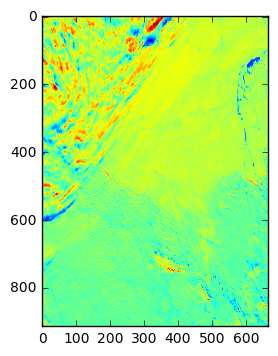

In [303]:
from matplotlib import pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.imshow(data['B1'])

This is horrible for oh, so many reasons. One is the everpresent use of the jet color map. Lets pick a better color map.

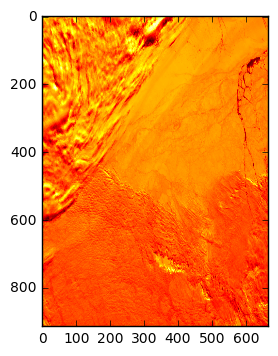

In [304]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
cmap = plt.get_cmap('hot')
ax.imshow(data['B1'], cmap = cmap)

We need a colorbar to interpret the colors. We can add one:

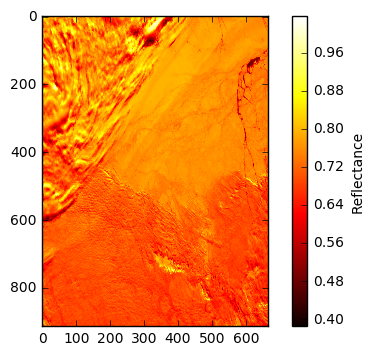

In [305]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
cmap = plt.get_cmap('hot')
fig_image = ax.imshow(data['B1'], cmap = cmap)
cax = fig.colorbar(fig_image, ax = ax)
cax.set_label("Reflectance")

One problem we will find with a color map is that there are too many gradiations so it is hard to read reflectance (quantitative ratio variable) with more than 10 steps. However because this is really an image, if we introduced quantization they might be confused with edges on the ground. We will save this discussion for a future homework. Right now lets look in more detail at the kind of values we have beyond the max and min. We need the histogram.

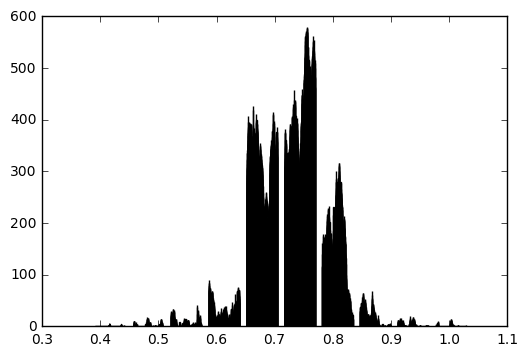

In [306]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
fig_image = ax.hist(data['B1'])

The missing gaps in the data may be a confict of quantization. We can now look at another band. Lets look at Band 6:

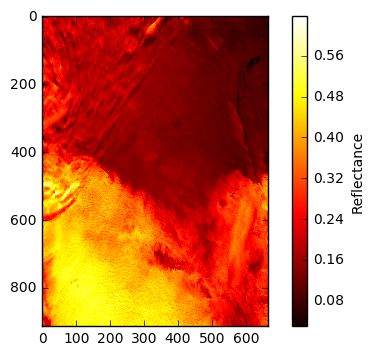

In [307]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
cmap = plt.get_cmap('hot')
fig_image = ax.imshow(data['B6'], cmap = cmap)
cax = fig.colorbar(fig_image)
cax.set_label("Reflectance")

Looks somewhat different. One way to compare the bands would be to do a scatter plot of the values of Band 1 vs Band 6. The problem is that there are too many pixels.

1. Find the total number of pixels in the image using data['B1'].shape, call that **number** N
2. We will set a sample percentage which we call spercentage as .45%  This should be around 4K points.
3. Number of samples we will use will be N*spercentage which should be around 4K points
4. To randomly choose points here is a snipit of code to get random indices:
    
        samplesInds =range(1,N)
        np.random.shuffle(samplesInds)
        samplesInds = samplesInds[0:numSamps]
    
5. Lets call the image b1=data['B1']. Then b1.ravel()[sampleInds] are the values at the sampled pixels. Make a scatter plot of sampled b1 (x-axis) vs b6 (y-axis) where b6 are the corresponding points from Band 6, 'B6'.
6. Title the image "A comparison of Band 1 and Band 6 Reflectance." 
7. Title the x-axis Band 1 Reflectance and y Band 6 Reflectance
8. All the dots at this point may look like a big jumble. Set the alpha (transparency) low enough so you can see where the dots are bunching up.
9. Chose an size (other than default), color, and marker.

One thing we like to do is compare with a linear regression. If the data fits a line then there should be a good corrolation between line fit and the data.

10. Use the polyfit function to fit the B1 samples vs. the B6 samples to get a line fit.
11. Use polyval (on two x values ... one just below the min (90%) and one just above max (110%)) to get a bet fit line.
12. Show the line (plot) in red on top of the samples.
13. Make sure you have a legend that says "Linear regression line"
14. Compute the slope and use matplotlibs "text" function to put a label "slope = " (the slope value) on the graph. You will need to manually adjust the position so it doesn't block other elements.
15. From scipy stats use get the pearson corrlollation coefficient and use the text to put that on the graph.
16. Do the same for Band 7 vs Band 6. Which is more related?

In [308]:
pixels = data['B1'].shape
N = (pixels[0]*pixels[1])
spercentage = .45
numSamps = int(N*spercentage)
samplesInds = list(range(1,N))
np.random.shuffle(samplesInds)
samplesInds = samplesInds[0:numSamps]

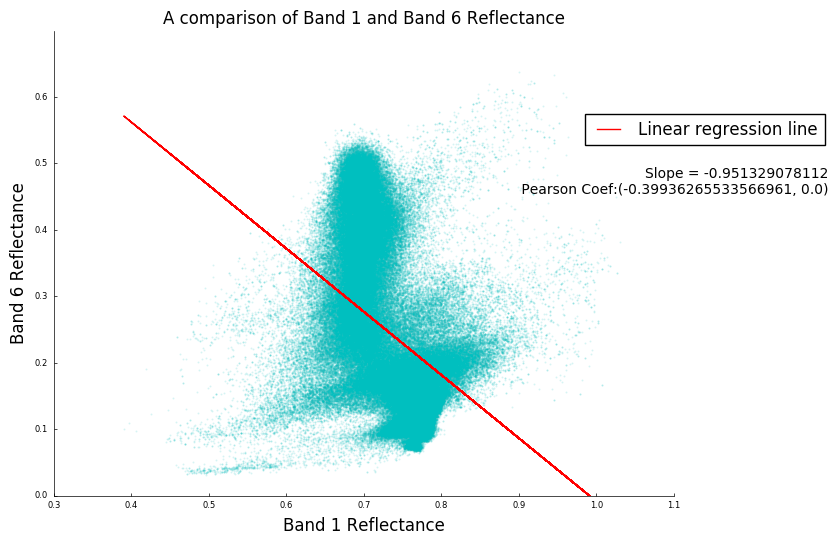

In [411]:
import scipy.stats

b1 = data['B1']
t = b1.ravel()[samplesInds]
b6 = data['B6']
y = b6.ravel()[samplesInds]

#first create the figure
fig = plt.figure(figsize=(8,6))

#create a grid of 1 row and 1 column for the plot
#[left, bottom, width, height]
gs = mpl.gridspec.GridSpec(1,1)
#put a plot in the first row, first column
ax = fig.add_subplot(gs[0])

#Have only two spines visible and set properties
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_linewidth(.5)
ax.xaxis.set_ticks_position('bottom')

ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(0.5)
ax.yaxis.set_ticks_position('left')

#set tick properties
ax.xaxis.set_tick_params('major', length=2, labelsize=6)
ax.yaxis.set_tick_params('major', length=2, labelsize=6)

ax.set_xlim((0.3,1.1))
ax.set_ylim((0.0,0.7))

#plot data and customize look of plot

ax.plot(t,y, marker='.', color='c', linestyle='',
        markersize=2, alpha=.1 ,clip_on=False)

#scale the view to show all datapoints
ax.autoscale_view()
plt.title("A comparison of Band 1 and Band 6 Reflectance")
#set labels
ax.set_xlabel(r'Band 1 Reflectance', fontsize=12, family='sans-serif')
ax.set_ylabel('Band 6 Reflectance', fontsize=12, family='sans-serif')

pPoly = np.polyfit(t,y,1)
y1 = np.polyval(pPoly,1.1) 
y2 = np.polyval(pPoly,.90)
#print(y1,y2)

plt.plot(t,np.polyval(pPoly,t),'r-',label='Linear regression line')
plt.legend(bbox_to_anchor=(1.05, 1), loc=9, borderaxespad=5.)

slope = ('Slope = ' + str(pPoly[0]))
coeff = ('\n Pearson Coef:' + str(scipy.stats.pearsonr(t,y)))
ax.text(1.3, .45, slope + coeff, verticalalignment='bottom', horizontalalignment='right', fontsize=10)


#plt.plot([1.1,.9],[y1,y2],'r-', markersize=10, alpha=.7,label='Linear regression line')
#plt.plot(pPoly, linestyle="-",color='r',alpha=.7,label='Linear regression line')



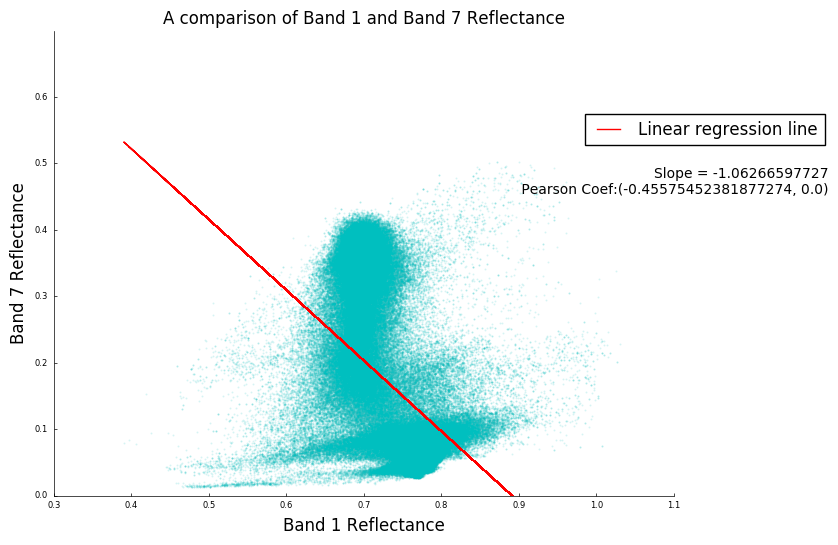

In [412]:
import scipy.stats

b1 = data['B1']
t = b1.ravel()[samplesInds]
b7 = data['B7']
y = b7.ravel()[samplesInds]

#first create the figure
fig = plt.figure(figsize=(8,6))

#create a grid of 1 row and 1 column for the plot
#[left, bottom, width, height]
gs = mpl.gridspec.GridSpec(1,1)
#put a plot in the first row, first column
ax = fig.add_subplot(gs[0])

#Have only two spines visible and set properties
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_linewidth(.5)
ax.xaxis.set_ticks_position('bottom')

ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(0.5)
ax.yaxis.set_ticks_position('left')

#set tick properties
ax.xaxis.set_tick_params('major', length=2, labelsize=6)
ax.yaxis.set_tick_params('major', length=2, labelsize=6)

ax.set_xlim((0.3,1.1))
ax.set_ylim((0.0,0.7))

#plot data and customize look of plot

ax.plot(t,y, marker='.', color='c', linestyle='',
        markersize=2, alpha=.1 ,clip_on=False)

#scale the view to show all datapoints
ax.autoscale_view()
plt.title("A comparison of Band 1 and Band 7 Reflectance")
#set labels
ax.set_xlabel(r'Band 1 Reflectance', fontsize=12, family='sans-serif')
ax.set_ylabel('Band 7 Reflectance', fontsize=12, family='sans-serif')

pPoly = np.polyfit(t,y,1)
y1 = np.polyval(pPoly,1.1) 
y2 = np.polyval(pPoly,.90)
#print(y1,y2)

plt.plot(t,np.polyval(pPoly,t),'r-',label='Linear regression line')
plt.legend(bbox_to_anchor=(1.05, 1), loc=9, borderaxespad=5.)

slope = ('Slope = ' + str(pPoly[0]))
coeff = ('\n Pearson Coef:' + str(scipy.stats.pearsonr(t,y)))
ax.text(1.3, .45, slope + coeff, verticalalignment='bottom', horizontalalignment='right', fontsize=10)


#plt.plot([1.1,.9],[y1,y2],'r-', markersize=10, alpha=.7,label='Linear regression line')
#plt.plot(pPoly, linestyle="-",color='r',alpha=.7,label='Linear regression line')




# Exercise 3: Distributions
----------------------------------------------------------------------------------

Download Hannah's world city temperature data from:

     http://glasslab.engr.ccny.cuny.edu/u/hannah/cs217/

For each city there are around 80,000 measurements of temperature from 1980 to 2009 for every 6 hours (4/day).


Part A: Box and Whiskers
*************************************

1. Convert the temperatures to Fahrenheit from Kelvin so they are more easily interpretable to an American audience.
2. Make a box and whiskers diagram where the Y axis is labeled by temperature in degrees Fahrenheit and the X axis is labeled by city. Since you don't want the city names to overlap, rotate the text so they run vertically. Use all the temperatures. Write a caption pointing out what interesting things to interpret from the cities.
3. In addition to the previous diagram, make a separate diagrams for the first 20,000 measurements and the last 20,000 measurements. Put them in a single figure (two separate subplots). Use the add_sublot for this. Label/title the total graph and subplots clearly. Do you see any trend?


Part B: Pandas and Trend Design Problem
********************************************


We would like to see if there has been any change over time in the temperatures of the city. Fluctuations may make it hard to see differences. For example a small but steady increase in average winter or summer temperatures, may be masked by hourly fluctuations. Working with dates can be rather tricky. Convert the mat data into Pandas data structures:

http://pandas.pydata.org/

Check out the tutorials on Pandas. 

1. Define Winter as December, January and Februrary; Spring as March, April and May; Summer as June, July and August and Fall as September, October and November. Separately for each **year** (1948-2008) and each **city** compute the average temperature for that seasons.
2. Design and create a graph(s) that shows the seasonal trends (or lack of trends) over the years from 1948 to 2008 (last year is incomplete). 

* Use small multiples with subplot and/or GridSpec to put multiple plots together for comparison
* Use linear regresion lines and corelation coeefficients to show existance or lack of trends over time
    
It is up to you how you will group the graphs. You may do it by city or by season but try to show trends or lack of trends in as compact a way as possible (high data to ink ratio) while supporting many visual queries. Visual queiries should include 
   
* Are there different trends for different seasons?
* How do city compare? Is there more or less of a change for tropical cities then temperate cities?

Be careful not to washout changes by, for example, grouping different cities together when computing changes. Also consider using filled area under the curve rather than a straight line plot (if appropriate). Also consider you scale carefully. Remember that the 0 of temperature is somewhat arbitrary. Often climatolgists will subtract an average over a series to show differences more clearly. When displaying the trend with the total average subtracted we call this the "temperature anomaly" and label as such. In the caption or somewhere else should clearly describe how the data has been processed (which mean is subtracted, what averages are shown). 

Note: Your graphs should be understandable to anyone reading them. Look at them carefully assuming the person viewing them did not read this homework assignment.

In [454]:
johan = loadmat('Johannesburg.mat')
paris = loadmat('Paris.mat')
spaulo = loadmat('SaoPaulo.mat')
singapore = loadmat('Singapore.mat')
sydney = loadmat('Sydney.mat')
vancouver = loadmat('Vancouver.mat')


In [435]:
johan['temperature']

array([[ 289.5       ],
       [ 290.6000061 ],
       [ 300.5       ],
       ..., 
       [ 284.79998779],
       [ 298.5       ],
       [ 292.20001221]], dtype=float32)

In [455]:
type(johan['temperature'])
for i in range(0,len(johan['temperature'])):
    kelvin = johan['temperature'][i]
    johan['temperature'][i] = (kelvin*9/5.0)-459.67
    i += 1


In [443]:
print (johan['temperature'])
print (sydney['temperature'])
print (singapore['temperature'])



[[ 61.42996216]
 [ 63.41000366]
 [ 81.23001099]
 ..., 
 [ 52.97000122]
 [ 77.62997437]
 [ 66.29000854]]
[[ 74.38998413]
 [ 84.47000122]
 [ 68.81002808]
 ..., 
 [ 56.56997681]
 [ 47.75      ]
 [ 47.75      ]]
[[ 71.68997192]
 [ 75.29000854]
 [ 72.94998169]
 ..., 
 [ 79.25003052]
 [ 79.61001587]
 [ 76.01004028]]


In [456]:
for i in range(0,len(paris['temperature'])):
    kelvin = paris['temperature'][i]
    paris['temperature'][i] = (kelvin*9/5.0)-459.67
    i += 1
    
for i in range(0,len(spaulo['temperature'])):
    kelvin = spaulo['temperature'][i]
    spaulo['temperature'][i] = (kelvin*9/5.0)-459.67
    i += 1

for i in range(0,len(singapore['temperature'])):
    kelvin = singapore['temperature'][i]
    singapore['temperature'][i] = (kelvin*9/5.0)-459.67
    i += 1

for i in range(0,len(sydney['temperature'])):
    kelvin = sydney['temperature'][i]
    sydney['temperature'][i] = (kelvin*9/5.0)-459.67
    i += 1    

for i in range(0,len(vancouver['temperature'])):
    kelvin = vancouver['temperature'][i]
    vancouver['temperature'][i] = (kelvin*9/5.0)-459.67
    i += 1

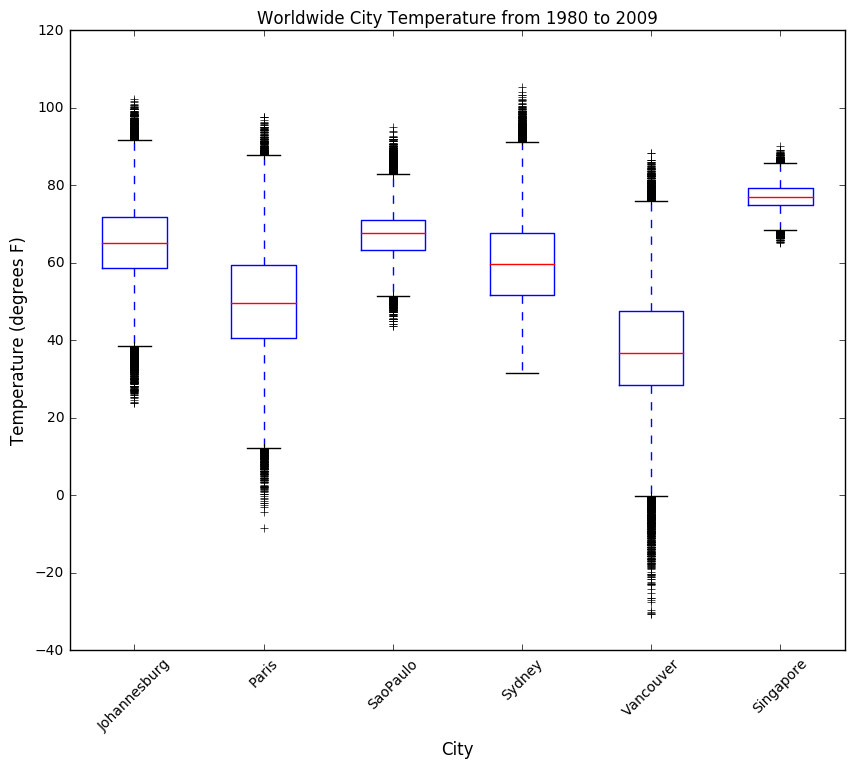

In [510]:
fig = plt.figure(figsize=(10,8))

#create a grid of 1 row and 1 column for the plot
#[left, bottom, width, height]
gs = mpl.gridspec.GridSpec(1,1)
#put a plot in the first row, first column
ax = fig.add_subplot(gs[0])
data_plot = [johan['temperature'],paris['temperature'], spaulo['temperature'], sydney['temperature'],vancouver['temperature'],singapore['temperature']]
plt.boxplot(data_plot)
plt.xticks([1, 2, 3, 4, 5 ,6], ['Johannesburg', 'Paris', 'SaoPaulo','Sydney','Vancouver','Singapore'],rotation=45)
ax.autoscale_view()
plt.title("Worldwide City Temperature from 1980 to 2009")
#set labels
ax.set_xlabel(r'City', fontsize=12, family='sans-serif')
ax.set_ylabel('Temperature (degrees F)', fontsize=12, family='sans-serif')


It is interesting to see the close conentration of temepratures in cities like Sao Paulo and Singapore, and the more drastic changes in temperatures in Paris and Vancouver which experience far colder winters. 

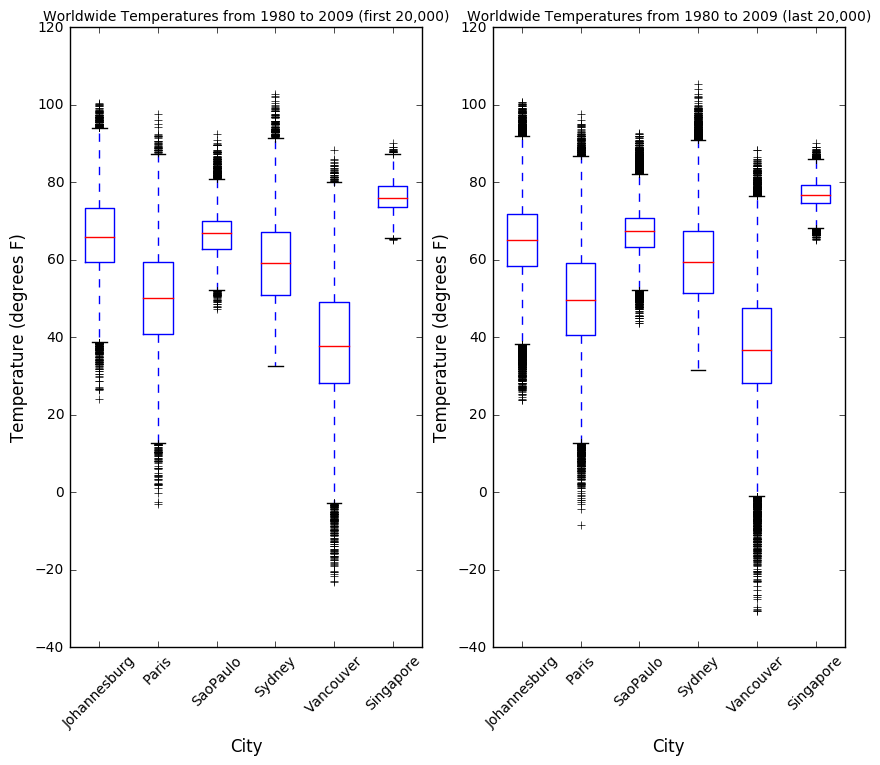

In [545]:
fig = plt.figure(figsize=(10,8))
gs = mpl.gridspec.GridSpec(1,2)
ax = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])

data_plot1 = [johan['temperature'][0:20000],paris['temperature'][0:20000], spaulo['temperature'][0:20000], sydney['temperature'][0:20000],vancouver['temperature'][0:20000],singapore['temperature'][0:20000]]
data_plot2 = [johan['temperature'][:-20000],paris['temperature'][:-20000], spaulo['temperature'][:-20000], sydney['temperature'][:-20000],vancouver['temperature'][:-20000],singapore['temperature'][:-20000]]

ax.boxplot(data_plot1)
ax2.boxplot(data_plot2)

ax.set_title('Worldwide Temperatures from 1980 to 2009 (first 20,000)',fontsize=10)
ax.set_xticklabels(['Johannesburg', 'Paris', 'SaoPaulo','Sydney','Vancouver','Singapore'],rotation=45)
ax.set_xlabel(r'City', fontsize=12, family='sans-serif')
ax.set_ylabel('Temperature (degrees F)', fontsize=12, family='sans-serif')

ax2.set_title('Worldwide Temperatures from 1980 to 2009 (last 20,000)',fontsize=10)
ax2.set_xticklabels(['Johannesburg', 'Paris', 'SaoPaulo','Sydney','Vancouver','Singapore'],rotation=45)
ax2.set_xlabel(r'City', fontsize=12, family='sans-serif')
ax2.set_ylabel('Temperature (degrees F)', fontsize=12, family='sans-serif')


In [547]:
import pandas as pd

In [624]:
temps = []
for i in range(0,len(johan['temperature'])):
    temp_value = johan['temperature'][i][0]
    temps.append(temp_value)
    i += 1

times = []
for i in range(0,len(johan['time'])):
    time_value = johan['time'][i]
    times.append(time_value)
    i += 1

In [625]:
data = {'time': times ,'temp':temps}

In [626]:
df = pd.DataFrame(data)

In [627]:
for i, row in df.iterrows():
    ifor_val = df['time'][i]
    ifor_val = ifor_val[0:7]
    df.set_value(i,'time',ifor_val)

In [659]:
winter = df.loc[df['time'].isin(['1948-12','1948-01','1948-02'])]
spring = df.loc[df['time'].isin(['1948-03','1948-04','1948-05'])]
summer = df.loc[df['time'].isin(['1948-06','1948-07','1948-08'])]
fall = df.loc[df['time'].isin(['1948-09','1948-10','1948-11'])]

In [660]:
winter_avg = sum(winter['temp'])/len(winter)
spring_avg = sum(spring['temp'])/len(spring)
summer_avg = sum(summer['temp'])/len(summer)
fall_avg = sum(fall['temp'])/len(fall) 

In [662]:
print(winter_avg)
print(spring_avg)
print(summer_avg)
print(fall_avg)

69.0795013092
64.9698316325
57.3526059856
72.1607650086


In [670]:
test = df[df.apply(lambda x: x['time'] < '1949', axis=1)]

In [674]:
df

,temp,time
0,61.429962,1948-01
1,63.410004,1948-01
2,81.230011,1948-01
3,70.970001,1948-01
4,63.230011,1948-01
5,65.209991,1948-01
6,81.769989,1948-01
7,72.230011,1948-01
8,64.129974,1948-01
9,65.929962,1948-01


In [598]:
df2 = pd.DataFrame({ 'temp': np.ndarray.flatten(johan['temperature']), 'time': johan['time']})

In [599]:
df2

,temp,time
0,61.429962,1948-01-01T00:00:00
1,63.410004,1948-01-01T06:00:00
2,81.230011,1948-01-01T12:00:00
3,70.970001,1948-01-01T18:00:00
4,63.230011,1948-01-02T00:00:00
5,65.209991,1948-01-02T06:00:00
6,81.769989,1948-01-02T12:00:00
7,72.230011,1948-01-02T18:00:00
8,64.129974,1948-01-03T00:00:00
9,65.929962,1948-01-03T06:00:00


Exercise 4: Preparing for Projects
----------------------------------------------------------------------------------

I will start a discussion thread for project ideas on blackboard. You should explore the data links given in the syllabus (yes, I know, there are alot).  Consider the following points:

* For your project your visualization should allow for intereactive exploration. It should provide support the Shneiderman Mantra of overview first, then filter and details on demand.
* Your project should involve data with at least 3 variables, preferably many more. In some cases the complexity may come in the filtering and how that filtering can be rolled up. For example, the temperature data of Ex. 2 has the variables time, city, and temperature. However, we can roll the data up by time of day, by month, by season, by year. We can look at maxes, mins or distributions. You will need to justify whatever exploration you propose.
* You should consider seeking a domain expert to figure out what kind of queries and exploration you want to support. If you want to work on a scientific visualization of climate data, I could advise you or direct you to a CCNY climate domain expert. If you are interested in (for example), biology data, pyschology data, economic data, or literature/language data you could consult and expert in one of those fields at CCNY. It would be best if you have a project whose use can persist beyond the scope of the course.
    
At this point you are not yet making a formal project proposal. I just want to see a conversation. Post your suggestion as at least a paragraph pitching your idea. Comment on at least two others on the thread with constructive critism. 